In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Training Images

In [2]:
# check MNIST training images matrix shape
print(mnist.train.images.shape)
print(mnist.train.labels.shape)
print(mnist.test.images.shape)
print(mnist.test.labels.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


(28, 28)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


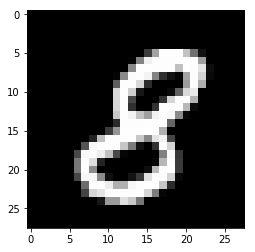

In [3]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
print(sample_img.shape)
# plot the image
plt.imshow(sample_img, cmap='gray')
print(mnist.train.labels[5])

# Defining a Neural Network
![](https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png)
## in a vector equation:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png)

In [4]:
# define a neural network (softmax logistic regression)
# input image: x and label: y
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
predict = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
print(x)
print(predict)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Softmax:0", shape=(?, 10), dtype=float32)


In [5]:
# define the train step to minimize the cross entropy between y and prediction with SGD
cross_entropy = -tf.reduce_sum(y*tf.log(predict))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
print(train_step)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ApplyGradientDescent"



In [6]:
# initialize variables and session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 128 elements with 1000 iterations
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    _, loss = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y: batch_ys})
    print("loss =", loss)

In [7]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(predict, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

0.911


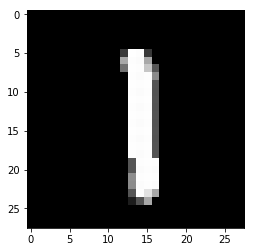

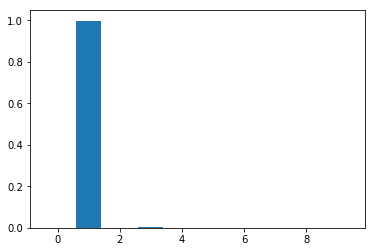

In [8]:
# predict from network
index = np.random.randint(10000)
digit = mnist.train.images[index]
img = digit.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

y_tf_out = sess.run(predict, feed_dict={x: digit.reshape(1, 784)})
plt.bar(range(0, 10), y_tf_out[0])
plt.show()